In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df_train = pd.read_csv('train.csv')
df_train['class'] = pd.read_csv("trainLabels.csv")
df_train

,0.29940251144353242,-1.2266241875260637,1.4984250500215328,-1.1761503610375272,5.2898525545597037,0.20829711393323402,2.4044983672405826,1.5945062220589785,-0.051608163273514231,0.66323431039687908,...,-0.62298999638261954,-1.8330573433160038,0.29302438506869571,3.5526813410266507,0.71761099417552265,3.3059719748508889,-2.7155588147154619,-2.6824085866346223,0.10105047232890663,class
0,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761,0
1,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436,0
2,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397,1
3,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332,0
4,-0.773247,-0.123227,0.047423,-0.210266,10.377793,0.526604,-2.751616,0.315541,0.608603,-0.043421,...,0.792790,-0.540711,0.114115,-0.277477,-0.896411,-2.805207,0.469162,3.614157,0.081689,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-0.310429,0.826811,-0.952245,0.768850,1.877520,1.320646,1.944609,1.191420,-0.127724,0.070937,...,-0.383792,0.745596,-0.698598,-2.729937,-0.431535,0.372873,1.019092,-2.672811,-0.295141,0
995,-1.853879,0.246726,0.459921,-2.074267,7.599220,-0.138355,-4.501900,0.630634,-1.590533,-1.112949,...,0.240052,-0.856196,-0.072481,-2.935896,0.582411,-2.613407,0.036687,2.809310,4.412567,1
996,0.912748,-1.734039,-1.047035,0.217573,13.457812,0.162771,-2.250521,2.216161,-0.378326,0.642114,...,-1.073806,-2.754369,1.814864,-4.190105,-1.116441,-2.100125,0.061513,0.895536,0.813686,1
997,2.439780,-0.735511,-0.902426,1.365036,-10.430299,-0.856859,2.686474,0.292035,0.585388,-0.876965,...,-0.039488,0.773876,-0.916066,2.604827,-0.649874,-3.423674,0.229748,-2.311088,-3.422217,0


In [4]:
df_train.describe()

,0.29940251144353242,-1.2266241875260637,1.4984250500215328,-1.1761503610375272,5.2898525545597037,0.20829711393323402,2.4044983672405826,1.5945062220589785,-0.051608163273514231,0.66323431039687908,...,-0.62298999638261954,-1.8330573433160038,0.29302438506869571,3.5526813410266507,0.71761099417552265,3.3059719748508889,-2.7155588147154619,-2.6824085866346223,0.10105047232890663,class
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000
mean,0.025322,-0.023323,-0.025612,-0.001096,1.088127,-0.006465,0.495433,-0.039517,0.026469,-0.004264,...,0.023598,-0.541199,-0.011913,-0.487548,0.032686,0.564443,0.009574,-0.890867,0.609960,0.50951
std,1.008750,1.016094,0.978412,0.970349,4.539161,0.989601,2.119020,2.232776,1.001562,1.013808,...,1.001668,2.240688,1.022922,2.118491,1.007316,2.227304,0.994404,2.022240,2.046400,0.50016
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086,0.00000
25%,-0.670358,-0.690859,-0.700048,-0.616548,-1.805683,-0.733114,-0.839542,-1.607010,-0.680114,-0.682246,...,-0.696257,-2.123069,-0.664966,-1.880040,-0.643513,-1.060154,-0.689890,-2.214672,-0.565156,0.00000
50%,0.023121,-0.031181,0.008037,0.003735,0.858932,0.025803,0.571475,0.017761,0.022855,-0.037531,...,0.050187,-0.568168,-0.028179,-0.493701,0.036975,0.453544,0.038464,-0.853259,0.780175,1.00000
75%,0.762980,0.683464,0.657948,0.640968,3.836911,0.671494,1.912284,1.436715,0.741949,0.666416,...,0.700093,0.940334,0.651692,0.997741,0.690139,2.120006,0.693603,0.390982,1.994308,1.00000
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984,1.00000


In [5]:
df_train.isnull().sum()

0.29940251144353242      0
-1.2266241875260637      0
1.4984250500215328       0
-1.1761503610375272      0
5.2898525545597037       0
0.20829711393323402      0
2.4044983672405826       0
1.5945062220589785       0
-0.051608163273514231    0
0.66323431039687908      0
-1.4083700642531511      0
1.1147436351160869       0
0.91041530967390116      0
2.2181103179158135       0
4.3056427290235391       0
0.088923978050666208     0
0.1691492586690862       0
0.41344763764684195      0
1.5138621708864943       0
2.6629665829474161       0
-1.0727654812214888      0
0.14911112051014644      0
0.55957919164070269      0
4.3788846423749064       0
-0.4636026556416834      0
-0.063959155289009084    0
0.54493030536966891      0
0.71277166708074502      0
-1.4940501263538932      0
-2.6361688752136554      0
-0.85046544625016463     0
-0.62298999638261954     0
-1.8330573433160038      0
0.29302438506869571      0
3.5526813410266507       0
0.71761099417552265      0
3.3059719748508889       0
-

In [6]:
df_train.dtypes

0.29940251144353242      float64
-1.2266241875260637      float64
1.4984250500215328       float64
-1.1761503610375272      float64
5.2898525545597037       float64
0.20829711393323402      float64
2.4044983672405826       float64
1.5945062220589785       float64
-0.051608163273514231    float64
0.66323431039687908      float64
-1.4083700642531511      float64
1.1147436351160869       float64
0.91041530967390116      float64
2.2181103179158135       float64
4.3056427290235391       float64
0.088923978050666208     float64
0.1691492586690862       float64
0.41344763764684195      float64
1.5138621708864943       float64
2.6629665829474161       float64
-1.0727654812214888      float64
0.14911112051014644      float64
0.55957919164070269      float64
4.3788846423749064       float64
-0.4636026556416834      float64
-0.063959155289009084    float64
0.54493030536966891      float64
0.71277166708074502      float64
-1.4940501263538932      float64
-2.6361688752136554      float64
-0.8504654

In [7]:
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1] 

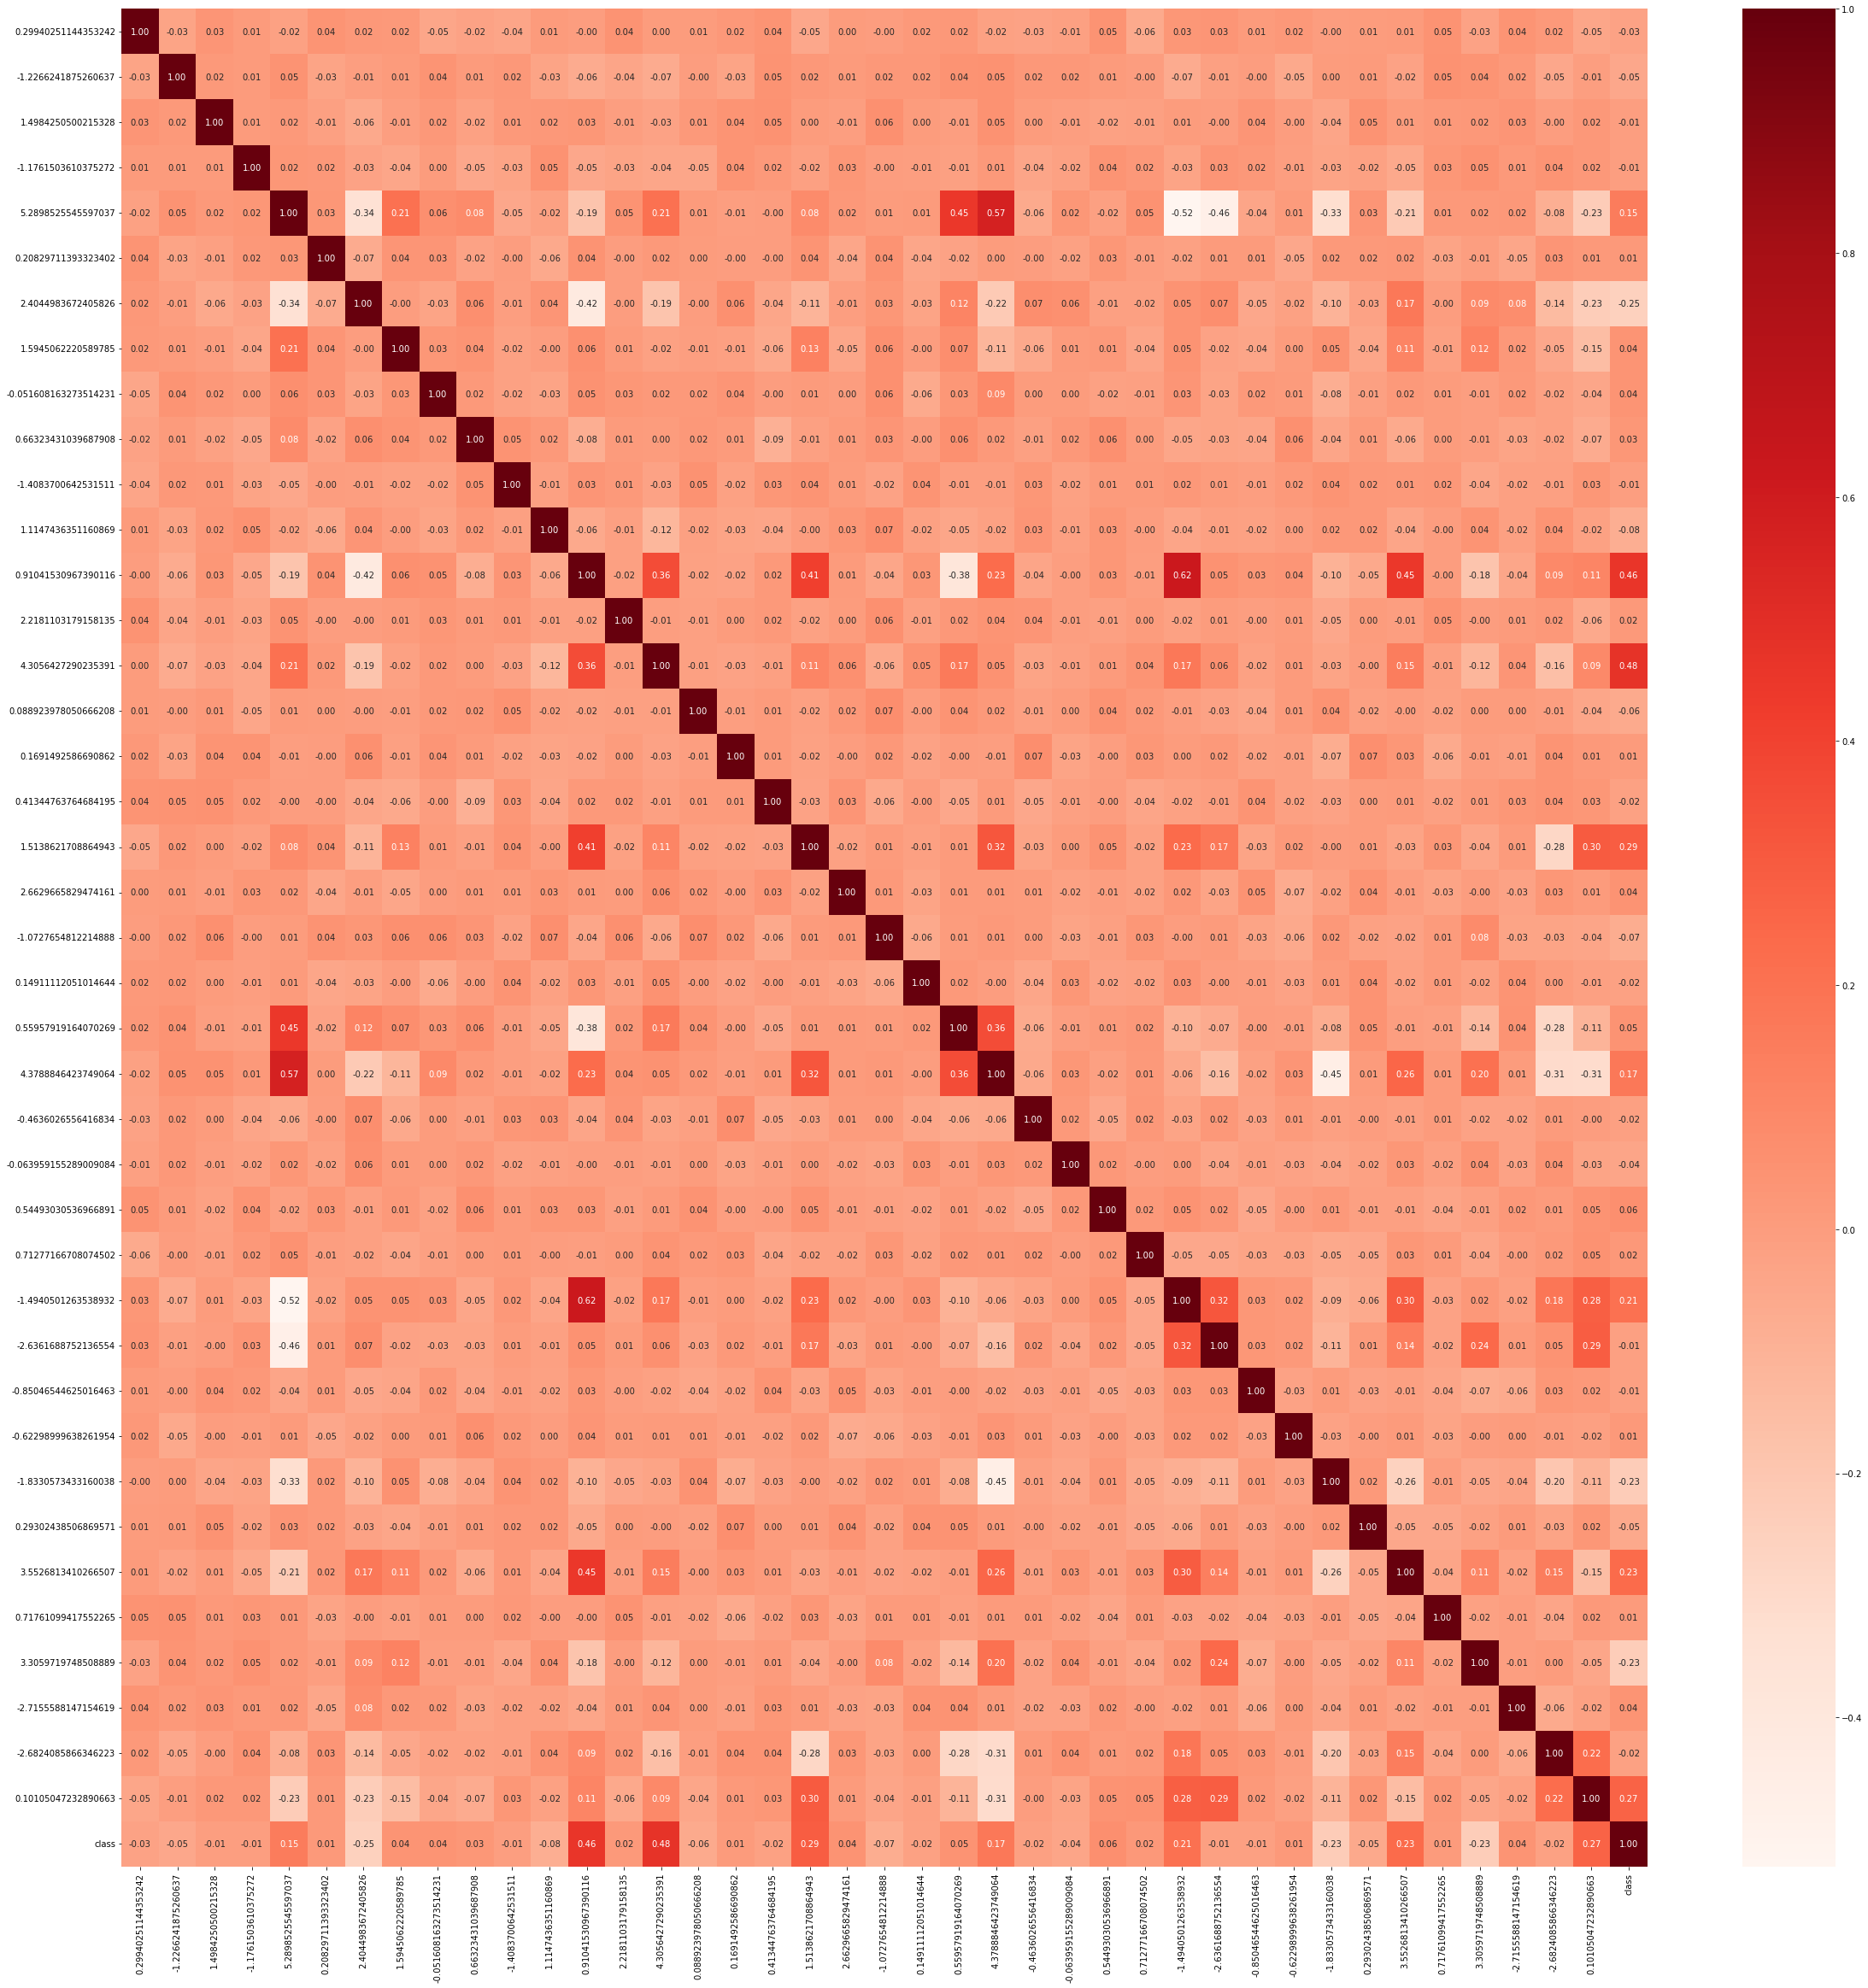

In [8]:
plt.figure(figsize=(40,40))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f')
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=44, shuffle =True)

In [10]:
GBCModel = GradientBoostingClassifier(n_estimators=250, max_depth=6, learning_rate=0.1, random_state=0)
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

GBCModel Train Score is :  1.0
GBCModel Test Score is :  0.94


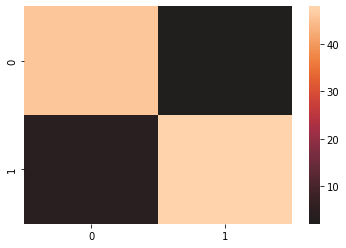

Confusion Matrix is
 [[46  2]
 [ 4 48]]


In [11]:
y_pred_GB = GBCModel.predict(X_test)
CM_GB = confusion_matrix(y_test, y_pred_GB)

sns.heatmap(CM_GB, center=True)
plt.show()

print('Confusion Matrix is\n', CM_GB)

In [12]:
SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=400,C=1.0,gamma='auto',probability=True)
SVCModel.fit(X_train, y_train)
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))

SVCModel Train Score is :  0.9977753058954394
SVCModel Test Score is :  0.95


C:\Users\kahya\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


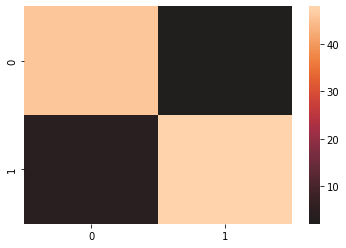

Confusion Matrix is
 [[46  2]
 [ 4 48]]


In [13]:
y_pred_SVC = SVCModel.predict(X_test)
CM_SVC = confusion_matrix(y_test, y_pred_GB)

sns.heatmap(CM_SVC, center=True)
plt.show()

print('Confusion Matrix is\n', CM_SVC)

# KNN Model

In [14]:
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 7,weights ='distance', # it can be distance
                                          algorithm='auto') # it can be ball_tree, kd_tree,brute
KNNClassifierModel.fit(X_train, y_train)

print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(X_test, y_test))

KNNClassifierModel Train Score is :  1.0
KNNClassifierModel Test Score is :  0.95


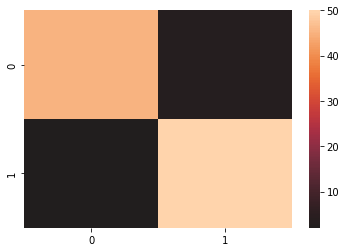

Confusion Matrix is
 [[46  2]
 [ 4 48]]


In [15]:
y_pred_KNN = KNNClassifierModel.predict(X_test)
CM_KNN = confusion_matrix(y_test, y_pred_KNN)

sns.heatmap(CM_KNN, center=True)
plt.show()

print('Confusion Matrix is\n', CM_SVC)

In [17]:
MLPClassifierModel = MLPClassifier(activation='relu', # can be also identity , logistic , relu
                                   solver='adam',  # can be also sgd , adam
                                   learning_rate='constant', # can be also invscaling , adaptive
                                   early_stopping= False,
                                   alpha=0.09 ,hidden_layer_sizes=(128, 3),random_state=33)
MLPClassifierModel.fit(X_train, y_train)

print('MLPClassifierModel Train Score is : ' , MLPClassifierModel.score(X_train, y_train))
print('MLPClassifierModel Test Score is : ' , MLPClassifierModel.score(X_test, y_test))
print('MLPClassifierModel loss is : ' , MLPClassifierModel.loss_)
print('MLPClassifierModel No. of iterations is : ' , MLPClassifierModel.n_iter_)
print('MLPClassifierModel No. of layers is : ' , MLPClassifierModel.n_layers_)
print('MLPClassifierModel last activation is : ' , MLPClassifierModel.out_activation_)

MLPClassifierModel Train Score is :  1.0
MLPClassifierModel Test Score is :  0.94
MLPClassifierModel loss is :  0.02357558125389218
MLPClassifierModel No. of iterations is :  168
MLPClassifierModel No. of layers is :  4
MLPClassifierModel last activation is :  logistic


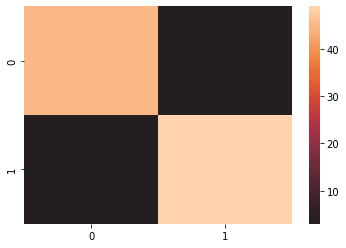

Confusion Matrix is
 [[45  3]
 [ 3 49]]


In [18]:
y_pred_MLP = MLPClassifierModel.predict(X_test)
CM_MLP = confusion_matrix(y_test, y_pred_MLP)

sns.heatmap(CM_MLP, center=True)
plt.show()

print('Confusion Matrix is\n', CM_MLP)


# Voting Model

In [19]:
VotingClassifierModel = VotingClassifier(estimators=[('GBCModel',GBCModel),
                                                     ('SVModel',SVCModel),
                                                     ('KNNModel',KNNClassifierModel),
                                                     ('MLPModel',MLPClassifierModel)],
                                         voting='soft')
VotingClassifierModel.fit(X_train, y_train)
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModel.score(X_test, y_test))

C:\Users\kahya\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


VotingClassifierModel Train Score is :  1.0
VotingClassifierModel Test Score is :  0.95


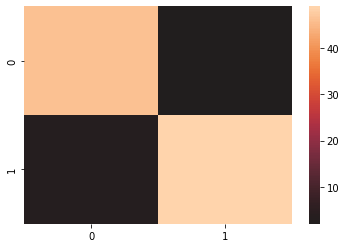

Confusion Matrix is
 [[46  2]
 [ 3 49]]


In [20]:
y_pred_V = VotingClassifierModel.predict(X_test)
CM_V = confusion_matrix(y_test, y_pred_V)
sns.heatmap(CM_V, center=True)
plt.show()
print('Confusion Matrix is\n', CM_V)

In [22]:
df_test = pd.read_csv('test.csv')
df_test

,2.8089094884322816,-0.2428941541280098,-0.54642134078742799,0.25516185655651813,1.7497359401586778,-0.030457614747139938,-1.3220705648016891,3.5780706827705329,-0.66757846469285065,-0.88425685382194696,...,-0.26168811207868709,-0.22437538915802702,-1.6756055243798111,-0.47958360985977283,-0.24438814509352236,-0.67235457360991246,0.51786002310577695,0.010664676497809677,-0.41921432660528302,2.8183870993565581
0,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
1,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
2,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
3,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213
4,-0.424627,1.536196,-1.037752,-0.156466,-2.945038,-0.471607,3.494966,-2.763629,0.819540,0.209529,...,-0.727066,-0.809620,4.504230,-0.481077,-2.923646,-0.468034,-0.846214,1.197350,-5.615563,2.049134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,0.171644,-0.806952,-2.045671,0.021156,2.258491,0.429469,0.857187,0.972600,1.707492,1.676370,...,-1.366312,0.276543,-0.732764,0.243930,-1.151233,-0.274298,0.573013,1.109814,-1.905965,1.457601
8995,1.168564,-0.911253,1.685492,0.867183,3.606170,-0.673875,-1.889365,0.411385,-0.206817,-0.705771,...,0.557757,0.379841,-1.474198,-0.322943,1.964519,0.122384,0.678023,2.024129,0.386542,1.104493
8996,0.052274,-1.736558,-0.263699,-0.219329,8.918393,-1.258320,-3.361146,0.893366,-0.631669,1.887286,...,2.117847,-1.050824,0.182872,0.242725,0.670161,0.112752,-3.006949,1.179606,1.156340,-1.218561
8997,1.443659,0.651892,0.550724,-1.146664,2.621641,-0.867143,0.312742,1.078004,-1.212524,-0.028143,...,0.631480,1.186236,-1.098508,1.159658,-1.957241,0.482533,3.777669,-0.424954,1.333374,2.325271


In [23]:
df_test.isnull().sum()

2.8089094884322816       0
-0.2428941541280098      0
-0.54642134078742799     0
0.25516185655651813      0
1.7497359401586778       0
-0.030457614747139938    0
-1.3220705648016891      0
3.5780706827705329       0
-0.66757846469285065     0
-0.88425685382194696     0
-0.24779664094881909     0
1.527068354781056        0
3.3599631099311633       0
1.1724995909969318       0
1.8238645074812307       0
0.032364604944737911     0
-0.50647428755445034     0
0.11677482005401195      0
0.30279634037040803      0
-0.069676590551780507    0
-1.067652415120282       0
0.26885488053453738      0
-2.1148159573276804      0
-2.829966251946062       0
-0.37952030872252163     0
2.4982890985243977       0
-0.94309462862601268     0
0.82602315286503714      0
0.73835250480304282      0
-1.250244334151501       0
-0.26168811207868709     0
-0.22437538915802702     0
-1.6756055243798111      0
-0.47958360985977283     0
-0.24438814509352236     0
-0.67235457360991246     0
0.51786002310577695      0
0

In [24]:
x_predict = df_test.iloc[:]

In [25]:
y_pred_sv = SVCModel.predict(x_predict)
y_pred_v = VotingClassifierModel.predict(x_predict)

C:\Users\kahya\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- -0.030457614747139938
- -0.069676590551780507
- -0.22437538915802702
- -0.2428941541280098
- -0.24438814509352236
- ...
Feature names seen at fit time, yet now missing:
- -0.051608163273514231
- -0.063959155289009084
- -0.4636026556416834
- -0.62298999638261954
- -0.85046544625016463
- ...

  warnings.warn(message, FutureWarning)
C:\Users\kahya\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- -0.030457614747139938
- -0.069676590551780507
- -0.22437538915802702
- -0.2428941541280098
- -0.24438814509352236
- ...
Feature names seen at fit time, yet now missing:
- -0.05

In [26]:
submission_sv = pd.DataFrame(y_pred_sv)
submission_v = pd.DataFrame(y_pred_v)

submission_sv.columns = ['Solution']
submission_v.columns = ['Solution']

submission_sv['Id'] = pd.DataFrame(np.arange(1,submission_sv.shape[0]+1))
submission_v['Id'] = pd.DataFrame(np.arange(1,submission_v.shape[0]+1))

In [27]:
submission_sv = submission_sv[['Id', 'Solution']]
submission_v = submission_v[['Id', 'Solution']]

submission_sv.to_csv('submission_sv.csv', index=False)
submission_v.to_csv('submission_v.csv', index=False)